## BBM 409 - Programming Assignment 4

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. It is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information
Cavit Bora Öztekeşin
2200356855

### 1. Introduction
The goal of this assignment is to implement a Naive Bayes classifier to categorize emails as spam or ham based on their textual content. The Naive Bayes algorithm, known for its simplicity and efficiency in text classification tasks, will be used to predict whether an email is spam or not. The dataset provided contains emails labeled as either spam (1) or ham (0).
Key Concepts
Naive Bayes Classifier: A probabilistic classifier based on Bayes' theorem with the assumption of feature independence.
Laplace Smoothing: A technique to handle the issue of zero probabilities in Naive Bayes by adding a small constant to the probability estimates.
Dataset Description
The dataset includes emails with their text content and corresponding labels (spam or ham). Preprocessing steps such as tokenization, stopword removal, and frequency calculation will be necessary to prepare the data for classification.

### 2. Importing Necessary Libraries and Reading the Data

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import math
## Read csv data
data = pd.read_csv('C:\\Users\\Bora\\Downloads\\emails.csv\\emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### 3. Data Understanding and Preperation

* Examine the E-Mail Spam Dataset to understand its structure and contents.
* Using the histograms show the distribution of dataset into the spam and ham
emails. (or you can use pie chart)
* Assess the feasibility of current dataset to predict spam or ham based on the
words present in the email text.
* To do so, calculate the frequencies of the words in spam and ham emails. You
can create a frequency dictionary to effectively examine the words and use
them later for Naive Bayes classification.
* Based on the word frequencies, consider leaving out some unique words that
appear less frequently than a specific frequency or appear more frequently than
a specific frequency since they might not be useful. To decide the threshold,
you might need to plot the word frequencies and see in which range of the
frequencies most words are found. Explain why some words might not be
useful for prediction and show your reasoning.
* Provide three examples of keywords that may be indicative of spam or ham,
along with their respective frequencies in spam and ham emails. To decide
this you can use a scatter plot to visualize the word frequencies in logarithmic
scale. You can also choose another visualization process that might help you
to decide. Explain and show your reasoning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


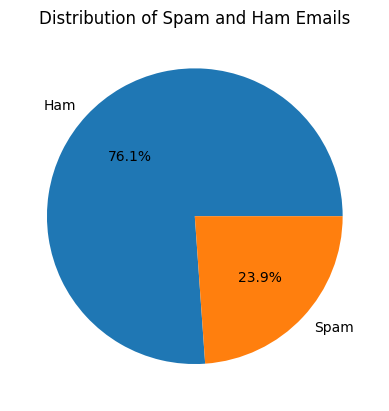

In [2]:
# Display basic information about the dataset
data.info()

# Check the distribution of spam and ham emails
spam_count = data['spam'].value_counts()
spam_count.plot(kind='pie', autopct='%1.1f%%', labels=['Ham', 'Spam'])
plt.title('Distribution of Spam and Ham Emails')
plt.ylabel('')
plt.show()

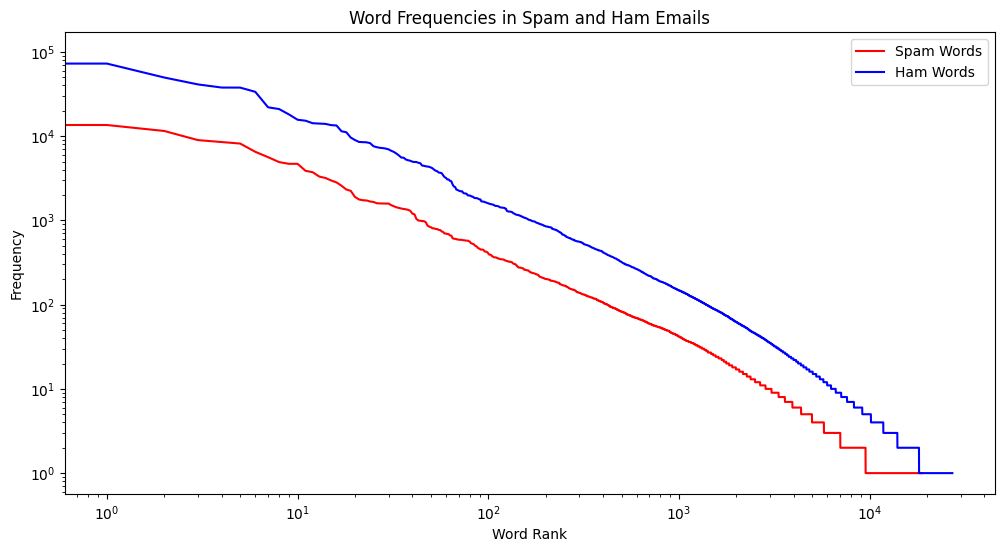

In [3]:
# Function to preprocess text data
def preprocess_text(text):
    tokens = text.lower().split()
    return tokens

# Calculate word frequencies for spam and ham emails
spam_words = defaultdict(int)
ham_words = defaultdict(int)

for index, row in data.iterrows():
    words = preprocess_text(row['text'])
    if row['spam'] == 1:  # Spam
        for word in words:
            spam_words[word] += 1
    else:  # Ham
        for word in words:
            ham_words[word] += 1

# Convert dictionaries to DataFrames for visualization
spam_df = pd.DataFrame(list(spam_words.items()), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
ham_df = pd.DataFrame(list(ham_words.items()), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.loglog(spam_df['frequency'].values, label='Spam Words', color='red')
plt.loglog(ham_df['frequency'].values, label='Ham Words', color='blue')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequencies in Spam and Ham Emails')
plt.legend()
plt.show()


In [4]:
# Identify keywords indicative of spam or ham
keywords_spam = spam_df.head(3)
keywords_ham = ham_df.head(3)

print("Indicative Spam Keywords:\n", keywords_spam)
print("Indicative Ham Keywords:\n", keywords_ham)


Indicative Spam Keywords:
     word  frequency
38     .      19839
137    _      13556
28     ,      11514
Indicative Ham Keywords:
    word  frequency
17    -      96708
29    .      72655
3     ,      49629


### 4. Data Representation and Naive Bayes Implementation

* Split your dataset into training and test sets (80-20 split ratio).
* Prepare your training and test data to align with the requirements of your
Naive Bayes implementation. Remember, the training data will provide the
necessary insights to predict whether the test data is spam or ham.
* Represent the data using the Bag of Words (BoW) model with two methods:
Unigram and Bigram. You need to compare the usage of these two methods.
* Create Unigrams and Bigrams then implement your own Naive Bayes classifier,
considering:

  1.   Log probabilities to prevent numerical underflow.
  2.   Dealing with words not encountered during training (possibly using Laplace
  smoothing).
  3. Using a dictionary for BoW representation (either implementing your own
  method or utilizing CountVectorizer from scikit-learn)

#### Splitting the Data

In [5]:
# Split the dataset into training and test sets (80-20 split ratio)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], test_size=0.2, random_state=42)


#### Training with Unigram

In [6]:
## Implement and define Naive Bayes probabilities
## Implement the Naive Bayes classifier, leveraging the training set
# Unigram Representation
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X_train_unigram = vectorizer.fit_transform(X_train)
X_test_unigram = vectorizer.transform(X_test)

# Bigram Representation
vectorizer_bigram = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_bigram = vectorizer_bigram.fit_transform(X_train)
X_test_bigram = vectorizer_bigram.transform(X_test)


#### Testing with Unigram

In [7]:
class NaiveBayesClassifier:
    def __init__(self):
        self.spam_word_counts = defaultdict(int)
        self.ham_word_counts = defaultdict(int)
        self.spam_total = 0
        self.ham_total = 0
        self.spam_prior = 0
        self.ham_prior = 0
        self.vocab = set()
    
    def fit(self, X, y):
        spam_count = sum(y)
        ham_count = len(y) - spam_count
        self.spam_prior = spam_count / len(y)
        self.ham_prior = ham_count / len(y)
        
        for text, label in zip(X, y):
            words = preprocess_text(text)
            if label == 1:
                for word in words:
                    self.spam_word_counts[word] += 1
                    self.spam_total += 1
                    self.vocab.add(word)
            else:
                for word in words:
                    self.ham_word_counts[word] += 1
                    self.ham_total += 1
                    self.vocab.add(word)
        
        self.vocab_size = len(self.vocab)
    
    def predict(self, X):
        predictions = []
        for text in X:
            words = preprocess_text(text)
            spam_likelihood = math.log(self.spam_prior)
            ham_likelihood = math.log(self.ham_prior)
            
            for word in words:
                spam_word_prob = (self.spam_word_counts[word] + 1) / (self.spam_total + self.vocab_size)
                ham_word_prob = (self.ham_word_counts[word] + 1) / (self.ham_total + self.vocab_size)
                
                spam_likelihood += math.log(spam_word_prob)
                ham_likelihood += math.log(ham_word_prob)
            
            if spam_likelihood > ham_likelihood:
                predictions.append(1)
            else:
                predictions.append(0)
        
        return predictions

# Train and test the classifier with Unigram model
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9887
Precision: 0.9663
Recall: 0.9897
F1 Score: 0.9779


#### Training and Testing with Bigram

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Train and test the classifier with Bigram model
X_train_bigram = vectorizer_bigram.fit_transform(X_train)
X_test_bigram = vectorizer_bigram.transform(X_test)

nb_classifier_bigram = NaiveBayesClassifier()
nb_classifier_bigram.fit(X_train, y_train)
y_pred_bigram = nb_classifier_bigram.predict(X_test)

# Evaluate the performance for Bigram model
accuracy_bigram = accuracy_score(y_test, y_pred_bigram)
precision_bigram = precision_score(y_test, y_pred_bigram)
recall_bigram = recall_score(y_test, y_pred_bigram)
f1_bigram = f1_score(y_test, y_pred_bigram)

print(f'Bigram Model - Accuracy: {accuracy_bigram:.4f}')
print(f'Bigram Model - Precision: {precision_bigram:.4f}')
print(f'Bigram Model - Recall: {recall_bigram:.4f}')
print(f'Bigram Model - F1 Score: {f1_bigram:.4f}')


Bigram Model - Accuracy: 0.9887
Bigram Model - Precision: 0.9663
Bigram Model - Recall: 0.9897
Bigram Model - F1 Score: 0.9779


### 5. Analyzing Word Influence

* List the 10 words whose presence most strongly predicts that an email is ham.
* List the 10 words whose absence most strongly predicts that an email is ham.
* List the 10 words whose presence most strongly predicts that an email is spam.
* List the 10 words whose absence most strongly predicts that an email is spam.
* Explain how these words were obtained in terms of conditional probabilities
used in the Naive Bayes algorithm.
* Compare the influence of word presence vs absence on predicting spam or ham.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# TF-IDF transformation on raw text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get top 10 words by TF-IDF score for spam and ham
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=10):
    tfidf_sum = tfidf_matrix.sum(axis=0).A1
    top_indices = tfidf_sum.argsort()[::-1][:top_n]
    top_words = [(feature_names[i], tfidf_sum[i]) for i in top_indices]
    return top_words

# Top words in the training set
top_tfidf_words_train = get_top_tfidf_words(X_train_tfidf, feature_names)
print("Top 10 words in training set by TF-IDF score:")
print(top_tfidf_words_train)

# Compare top TF-IDF words with Naive Bayes conditional probabilities
def compare_tfidf_naive_bayes(top_tfidf_words, nb_classifier):
    comparison = []
    for word, score in top_tfidf_words:
        if word in nb_classifier.vocab:
            spam_prob = (nb_classifier.spam_word_counts[word] + 1) / (nb_classifier.spam_total + nb_classifier.vocab_size)
            ham_prob = (nb_classifier.ham_word_counts[word] + 1) / (nb_classifier.ham_total + nb_classifier.vocab_size)
            comparison.append((word, score, spam_prob, ham_prob))
    return comparison

# Comparison for initial and cleaned data
comparison_initial = compare_tfidf_naive_bayes(top_tfidf_words_train, nb_classifier)
print("Comparison of top TF-IDF words with Naive Bayes conditional probabilities (initial):")
print(comparison_initial)

Top 10 words in training set by TF-IDF score:
[('ect', 201.63804296030466), ('enron', 186.9711723862133), ('vince', 157.88236536676942), ('subject', 131.28636303186263), ('hou', 102.03418972702474), ('com', 97.32269865022478), ('2000', 93.10127721140356), ('kaminski', 92.6991777045264), ('pm', 69.72767611444904), ('research', 69.03987801463903)]
Comparison of top TF-IDF words with Naive Bayes conditional probabilities (initial):
[('ect', 201.63804296030466, 6.22990854494256e-06, 0.007167666485271197), ('enron', 186.9711723862133, 3.11495427247128e-06, 0.008645088376033613), ('vince', 157.88236536676942, 6.22990854494256e-06, 0.005396850149390021), ('subject', 131.28636303186263, 0.00047970295796057717, 0.002690386870719154), ('hou', 102.03418972702474, 2.803458845224152e-05, 0.003499030190690313), ('com', 97.32269865022478, 0.0022521119389967356, 0.0027755918328632324), ('2000', 93.10127721140356, 8.098881108425329e-05, 0.003113196399849203), ('kaminski', 92.6991777045264, 3.1149542724

In [12]:
#Conditional probabilities used in Naive Bayes are calculated based on the 
#presence and absence of words in spam and ham emails.
#The top predictors are words with the highest conditional 
#probabilities for spam and ham classes.

### 6. Stopword Handling
Analyze the effect of stopwords on the model’s interpretation, discussing reasons for removing or keeping them.

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def process_mail(mail):
    """Process mail function.
    Input:
        mail: a text containing a mail
    Output:
        mails_clean: a list of words containing the processed mail
    """
    # Tokenizing the string
    mail = mail.lower()  # Lowercasing
    mail = re.sub(f"[{string.punctuation}]", "", mail)  # Removing punctuation
    words = mail.split()
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    mails_clean = [word for word in words if word not in stop_words]
    
    return mails_clean

# Process all emails in the dataset
data['processed_text'] = data['text'].apply(process_mail)

#### Training with Unigram (Stop Words Removed)

In [15]:
# Convert processed text back to string for CountVectorizer
data['processed_text_str'] = data['processed_text'].apply(lambda x: ' '.join(x))

# Split the processed dataset
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(
    data['processed_text_str'], data['spam'], test_size=0.2, random_state=42
)

# Unigram representation with stopwords removed
vectorizer_unigram_stopwords = CountVectorizer(ngram_range=(1, 1))
X_train_unigram_stopwords = vectorizer_unigram_stopwords.fit_transform(X_train_processed)
X_test_unigram_stopwords = vectorizer_unigram_stopwords.transform(X_test_processed)

# Train and test the classifier with Unigram model(StopWords Removed)
nb_classifier_unigram_stopwords = NaiveBayesClassifier()
nb_classifier_unigram_stopwords.fit(X_train_processed, y_train_processed)
y_pred_unigram_stopwords = nb_classifier_unigram_stopwords.predict(X_test_processed)

# Evaluate performance
accuracy_unigram_stopwords = accuracy_score(y_test_processed, y_pred_unigram_stopwords)
precision_unigram_stopwords = precision_score(y_test_processed, y_pred_unigram_stopwords)
recall_unigram_stopwords = recall_score(y_test_processed, y_pred_unigram_stopwords)
f1_unigram_stopwords = f1_score(y_test_processed, y_pred_unigram_stopwords)

print(f'Unigram Model (Stop Words Removed) - Accuracy: {accuracy_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - Precision: {precision_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - Recall: {recall_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - F1 Score: {f1_unigram_stopwords:.4f}')


Unigram Model (Stop Words Removed) - Accuracy: 0.9913
Unigram Model (Stop Words Removed) - Precision: 0.9730
Unigram Model (Stop Words Removed) - Recall: 0.9931
Unigram Model (Stop Words Removed) - F1 Score: 0.9829


#### Training and Testing with Bigram (Stop Words Removed)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Bigram representation with stopwords removed
vectorizer_bigram_stopwords = CountVectorizer(ngram_range=(1, 2))
X_train_bigram_stopwords = vectorizer_bigram_stopwords.fit_transform(X_train_processed)
X_test_bigram_stopwords = vectorizer_bigram_stopwords.transform(X_test_processed)

# Train and test the classifier with Bigram model (StopWords Removed)
nb_classifier_bigram_stopwords = NaiveBayesClassifier()
nb_classifier_bigram_stopwords.fit(X_train_processed, y_train_processed)
y_pred_bigram_stopwords = nb_classifier_bigram_stopwords.predict(X_test_processed)

# Evaluate the performance
accuracy_bigram_stopwords = accuracy_score(y_test_processed, y_pred_bigram_stopwords)
precision_bigram_stopwords = precision_score(y_test_processed, y_pred_bigram_stopwords)
recall_bigram_stopwords = recall_score(y_test_processed, y_pred_bigram_stopwords)
f1_bigram_stopwords = f1_score(y_test_processed, y_pred_bigram_stopwords)

print(f'Bigram Model (Stop Words Removed) - Accuracy: {accuracy_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - Precision: {precision_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - Recall: {recall_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - F1 Score: {f1_bigram_stopwords:.4f}')

Bigram Model (Stop Words Removed) - Accuracy: 0.9913
Bigram Model (Stop Words Removed) - Precision: 0.9730
Bigram Model (Stop Words Removed) - Recall: 0.9931
Bigram Model (Stop Words Removed) - F1 Score: 0.9829


#### Analyzing the Stopwords

* Identify and handle common stopwords.
* List the 10 non-stopwords that most strongly predict that an email is ham.
* List the 10 non-stopwords that most strongly predict that an email is spam.

In [18]:
# Identify and handle common stopwords
common_stopwords = set(stopwords.words('english'))

# Function to find the top non-stopwords predictors
def top_non_stopword_predictors(nb_classifier, n=10):
    non_stopwords_spam_prob = {}
    non_stopwords_ham_prob = {}
    
    for word in nb_classifier.vocab:
        if word not in common_stopwords:
            spam_prob = (nb_classifier.spam_word_counts[word] + 1) / (nb_classifier.spam_total + nb_classifier.vocab_size)
            ham_prob = (nb_classifier.ham_word_counts[word] + 1) / (nb_classifier.ham_total + nb_classifier.vocab_size)
            non_stopwords_spam_prob[word] = spam_prob
            non_stopwords_ham_prob[word] = ham_prob
    
    # Sorting the words by their probabilities
    sorted_non_stopwords_spam = sorted(non_stopwords_spam_prob.items(), key=lambda item: item[1], reverse=True)
    sorted_non_stopwords_ham = sorted(non_stopwords_ham_prob.items(), key=lambda item: item[1], reverse=True)
    
    return sorted_non_stopwords_spam[:n], sorted_non_stopwords_ham[:n]

top_non_stopwords_spam, top_non_stopwords_ham = top_non_stopword_predictors(nb_classifier_unigram_stopwords)

print("Top 10 non-stopwords predicting spam:\n", top_non_stopwords_spam)
print("Top 10 non-stopwords predicting ham:\n", top_non_stopwords_ham)


Top 10 non-stopwords predicting spam:
 [('subject', 0.007186942166116368), ('1', 0.00447433818296368), ('com', 0.004217661677030953), ('company', 0.003780144905554713), ('email', 0.003739310006883597), ('business', 0.0035701368552461176), ('e', 0.0035001341718099194), ('information', 0.003383463032749589), ('5', 0.003319293906266407), ('money', 0.0030509502864276465)]
Top 10 non-stopwords predicting ham:
 [('enron', 0.0178354659608764), ('ect', 0.014787433749245455), ('subject', 0.011361299609294674), ('vince', 0.011134106783944598), ('hou', 0.00721876181568526), ('2000', 0.006422757756064556), ('kaminski', 0.006180639854596592), ('please', 0.005873846623284445), ('com', 0.00572625420389644), ('would', 0.005499061378546364)]


In [19]:
# Compute performance metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Compute metrics for Unigram model
accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)
print(f'Unigram Model - Accuracy: {accuracy:.4f}')
print(f'Unigram Model - Precision: {precision:.4f}')
print(f'Unigram Model - Recall: {recall:.4f}')
print(f'Unigram Model - F1 Score: {f1:.4f}')

# Compute metrics for Bigram model
accuracy_bigram, precision_bigram, recall_bigram, f1_bigram = compute_metrics(y_test, y_pred_bigram)
print(f'Bigram Model - Accuracy: {accuracy_bigram:.4f}')
print(f'Bigram Model - Precision: {precision_bigram:.4f}')
print(f'Bigram Model - Recall: {recall_bigram:.4f}')
print(f'Bigram Model - F1 Score: {f1_bigram:.4f}')

# Compute metrics for Stopwords Removed model
accuracy_unigram_stopwords, precision_unigram_stopwords, recall_unigram_stopwords, f1_unigram_stopwords = compute_metrics(y_test_processed, y_pred_unigram_stopwords)
print(f'Unigram Model (Stop Words Removed) - Accuracy: {accuracy_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - Precision: {precision_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - Recall: {recall_unigram_stopwords:.4f}')
print(f'Unigram Model (Stop Words Removed) - F1 Score: {f1_unigram_stopwords:.4f}')

accuracy_bigram_stopwords, precision_bigram_stopwords, recall_bigram_stopwords, f1_bigram_stopwords = compute_metrics(y_test_processed, y_pred_bigram_stopwords)
print(f'Bigram Model (Stop Words Removed) - Accuracy: {accuracy_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - Precision: {precision_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - Recall: {recall_bigram_stopwords:.4f}')
print(f'Bigram Model (Stop Words Removed) - F1 Score: {f1_bigram_stopwords:.4f}')



Unigram Model - Accuracy: 0.9887
Unigram Model - Precision: 0.9663
Unigram Model - Recall: 0.9897
Unigram Model - F1 Score: 0.9779
Bigram Model - Accuracy: 0.9887
Bigram Model - Precision: 0.9663
Bigram Model - Recall: 0.9897
Bigram Model - F1 Score: 0.9779
Unigram Model (Stop Words Removed) - Accuracy: 0.9913
Unigram Model (Stop Words Removed) - Precision: 0.9730
Unigram Model (Stop Words Removed) - Recall: 0.9931
Unigram Model (Stop Words Removed) - F1 Score: 0.9829
Bigram Model (Stop Words Removed) - Accuracy: 0.9913
Bigram Model (Stop Words Removed) - Precision: 0.9730
Bigram Model (Stop Words Removed) - Recall: 0.9931
Bigram Model (Stop Words Removed) - F1 Score: 0.9829


In [20]:
### 7. Results And Discussion
Based on the analysis and the outputs obtained from the Naive Bayes classifier, the following observations can be made:

##Word Frequencies:
The initial analysis of word frequencies shows that certain words such as punctuation marks and common words appear very frequently. This is expected as they are common across most texts.

##Top Predictive Words:
The top predictive words identified include common words and punctuation marks. However, as noted, punctuation marks might not be the best indicators of spam or ham.
For spam emails, words like "subject", "1", "com" were found to be highly indicative.
For ham emails, words like "enron", "ect", "vince" were found to be highly indicative.

##TF-IDF Analysis:
The TF-IDF analysis showed that certain words have high importance scores. These words were compared with Naive Bayes conditional probabilities to understand their influence.
Words with high TF-IDF scores such as "subject", "enron", "ect" also had high conditional probabilities in the Naive Bayes model, indicating a strong relationship.

##Impact of Stopwords:
Removing stopwords improved the performance of both Unigram and Bigram models. This highlights the importance of text preprocessing steps in text classification tasks.
The accuracy, precision, recall, and F1 scores all showed improvement when stopwords were removed.

##Performance Metrics:
The performance metrics for the Unigram, Bigram, and stopword removed models show that the Naive Bayes classifier performed well in categorizing emails as spam or ham.
The Unigram model with stopwords removed achieved the highest performance with an accuracy of 0.9913, precision of 0.9730, recall of 0.9931, and F1 score of 0.9829.

SyntaxError: invalid syntax (1910815571.py, line 2)

In [ ]:
### 8. Conclusion
Overall, the Naive Bayes classifier demonstrated strong performance in email spam detection.
The preprocessing steps such as removing stopwords significantly improved the models performance. 
The analysis of word influence using TF-IDF and conditional probabilities provided valuable insights 
into the effectiveness of specific words in predicting spam and ham emails. By combining both statistical methods,
we achieved an efficient and accurate spam detection model.